In [400]:
### MLP: a neural probabilistic language model
### paper link: https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf
### 根据三个字母，预测第四个字母，最终生成一个名字，效果会比根据一个字母预测下一个字母更好。

In [323]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [324]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [330]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [331]:
# build dataset
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context),'--->', itos[ix])
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [378]:
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [379]:
# torch.cat([emb[:, 0, :],emb[:, 1, :],emb[:, 2, :]], 1).shape  # 内存操作，低效
# torch.cat(torch.unbind(emb, 1), 1).shape  # 内存操作，低效

In [380]:
for p in parameters:
    p.requires_grad = True

In [357]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10 ** lre

In [391]:
lri = []
lossi = []
stepi = []

for i in range(30000):

    ix = torch.randint(0, Xtr.shape[0], (32,))  # 随机32个输入作为一个批次训练
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdims=True)
    # loss = -probs[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix]) # 相比于上面，优点 1: 计算更高高效  2: 结果更加的平稳
    # print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
     
    # update
    # lr = lrs[i]
    lr = 10 ** -2
    for p in parameters:
        p.data += -lr * p.grad

    # track
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
    stepi.append(i)

In [392]:
print(loss.item())

2.3518917560577393


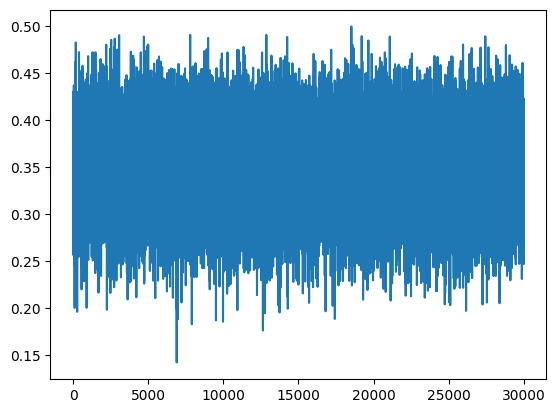

In [393]:
plt.plot(stepi, lossi)

In [394]:
# 评估整体数据的损失函数
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.2490291595458984


In [395]:
# 评估整体数据的损失函数
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.2603282928466797


In [371]:
C.shape

torch.Size([27, 2])

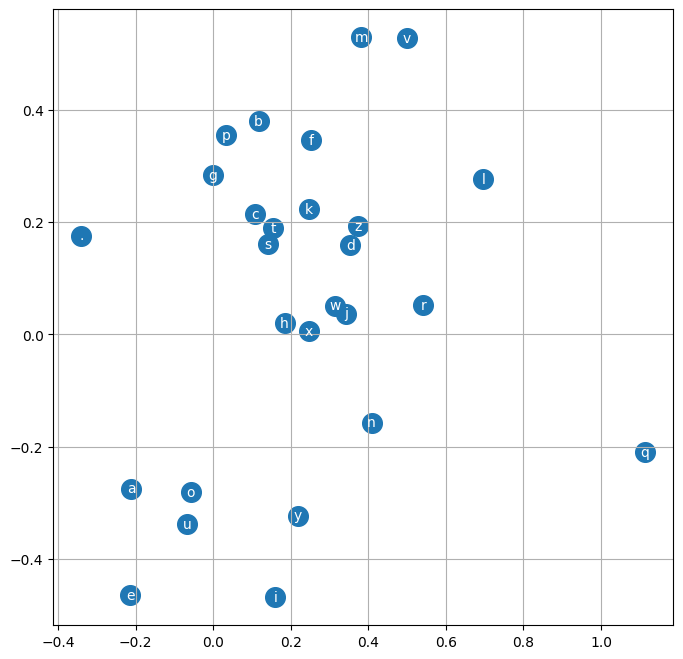

In [377]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid( 'minor')

In [399]:
## sample采样
for i in range(20):
    out = []
    context = [0] * block_size
    while True:
        # forward pass
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(-1,30) @ W1 + b1)
        logits = h @ W2 + b2
        probs = torch.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        context = context[1:] + [ix]

        if ix == 0:
            break
    print(''.join(out))
        

odlor.
alona.
ilyn.
cadyn.
chenna.
bolyanixo.
ryle.
leanalix.
kadolvie.
hodn.
bria.
ranna.
lasahdis.
axor.
eliah.
raio.
ainesperanchi.
aleya.
nay.
barca.
